#  **Entrenar Naive Bayes para clasificar tipo de permiso** #
**Objetivo:** Predecir "tipo_permiso" a partir del texto del motivo ##

**Dataset de entrada:** nb_dataset.csv (motivo, tipo_permiso) ##

**Modelo de salida:** nb_model.joblib


In [ ]:
# ================================================================
# 0. PREÁMBULO (copiar en Colab)
# ================================================================
# Título: Entrenar Naive Bayes para clasificar tipo de permiso
# Objetivo: Predecir "tipo_permiso" a partir del texto del motivo
# Dataset de entrada: nb_dataset.csv (motivo, tipo_permiso)
# Modelo de salida: nb_model.joblib
# ================================================================

In [ ]:
# ==== 1. Instalar solo lo que hace falta =======================
!pip install -q scikit-learn joblib pandas numpy

In [28]:
# ==== 2. Importar =============================================
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # Added import for WordCloud

In [29]:
# ==== 3. Cargar dataset ==========
df = pd.read_csv("nb_dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (3051, 2)


,motivo,tipo_permiso
0,audiencia judicial,cita_judicial
1,cuidado de recién nacido,paternidad
2,evento comunitario,permiso_voluntariado
3,duelo por ser querido,luto
4,reunión sindicato,sindical


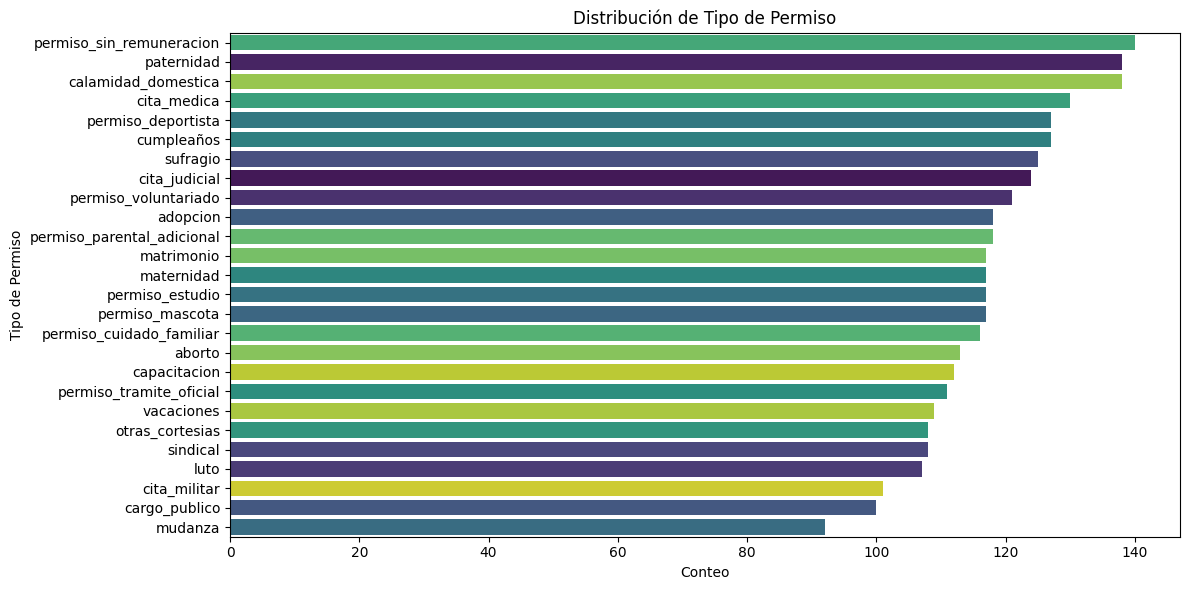

In [30]:
# Análisis exploratorio de datos (EDA)
# ==========================================
# 1. Frecuencias de tipo_permiso
# ==========================================
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='tipo_permiso', order = df['tipo_permiso'].value_counts().index, palette='viridis', hue='tipo_permiso', legend=False)
plt.title('Distribución de Tipo de Permiso')
plt.xlabel('Conteo')
plt.ylabel('Tipo de Permiso')
plt.tight_layout()
plt.show()

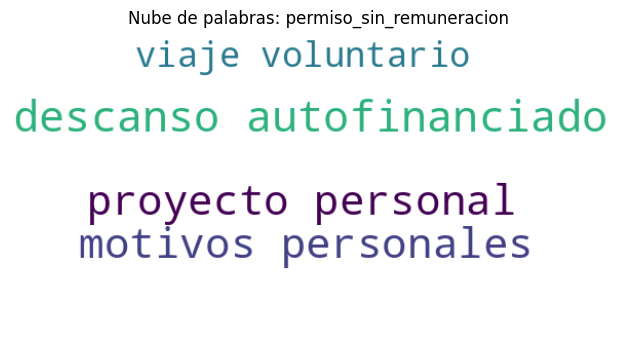

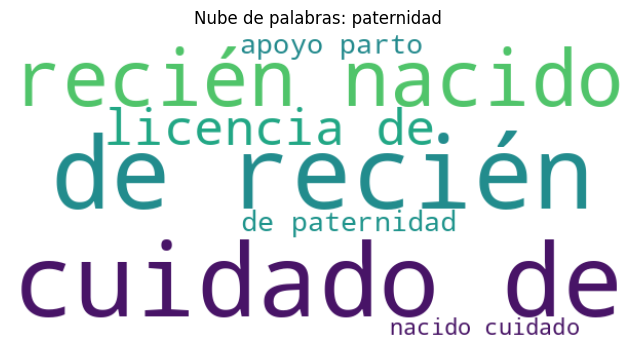

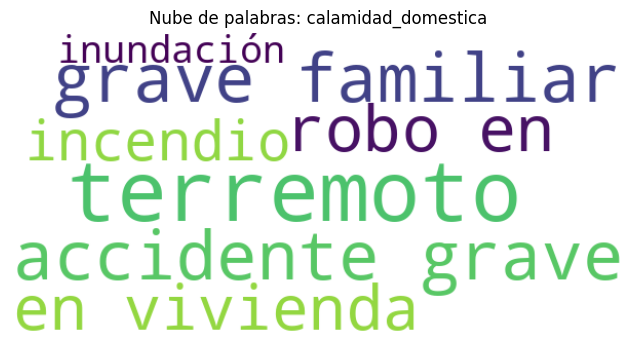

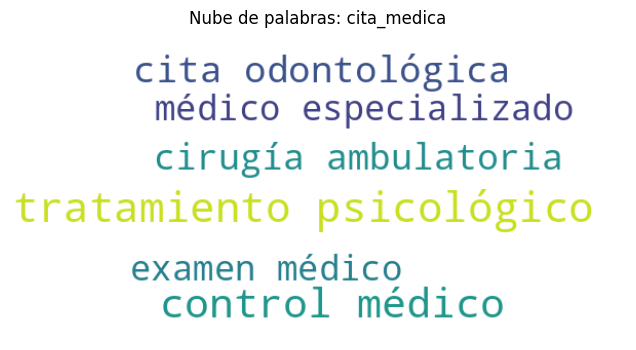

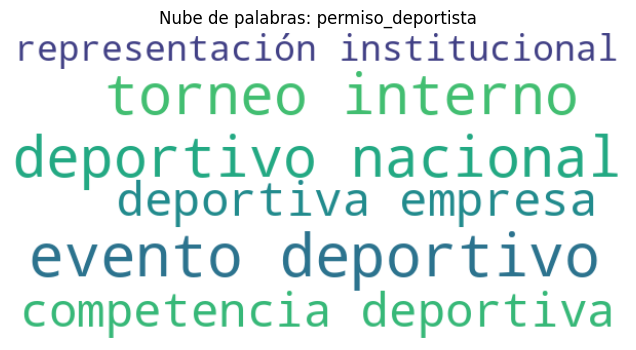

In [31]:
# ==========================================
# 2. Nube de palabras por tipo_permiso
# ==========================================
def nube_por_tipo(tipo):
    textos = df[df['tipo_permiso'] == tipo]['motivo'] # Changed 'motivo_limpio' to 'motivo'
    texto = ' '.join(textos)
    wc = WordCloud(width=600, height=300, background_color='white').generate(texto)
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nube de palabras: {tipo}")
    plt.show()

# Mostrar para los 5 tipos más comunes
top5 = df['tipo_permiso'].value_counts().head(5).index
for t in top5:
    nube_por_tipo(t)

In [42]:
# ==== 4. Separar X e y ========================================
X = df["motivo"]
y = df["tipo_permiso"]

In [43]:
# ==== 5. Split 80-20 ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
# ==== 6. Crear pipeline =======================================
model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="spanish", max_features=5000)),
    ("nb", MultinomialNB())
])

In [46]:
# ==== 7. Entrenar =============================================
# Fix: Redefine the model with corrected TfidfVectorizer before fitting
# The original error was 'InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got 'spanish' instead.'
# TfidfVectorizer does not have a built-in list for 'spanish' stop words.
# Changing 'stop_words="spanish"' to 'stop_words=None' to resolve the error.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words=None, max_features=5000)),
    ("nb", MultinomialNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('nb', MultinomialNB())])

In [47]:
# ==== 8. Evaluar ==============================================
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9819967266775778

Reporte de clasificación:
                            precision    recall  f1-score   support

                    aborto       0.74      1.00      0.85        23
                  adopcion       1.00      1.00      1.00        24
       calamidad_domestica       1.00      1.00      1.00        28
              capacitacion       1.00      1.00      1.00        22
             cargo_publico       1.00      1.00      1.00        20
             cita_judicial       1.00      1.00      1.00        25
               cita_medica       1.00      1.00      1.00        26
              cita_militar       1.00      1.00      1.00        20
                cumpleaños       0.90      1.00      0.95        26
                      luto       1.00      1.00      1.00        21
                maternidad       1.00      0.65      0.79        23
                matrimonio       1.00      1.00      1.00        23
                   mudanza       1.00      1.00      1.00  

In [50]:
# ==== 9. Guardar modelo (con nombre nuevo) ====================
joblib.dump(model, "nb_model_fijo.joblib")
print("✅ Modelo guardado: nb_model_fijo.joblib")

✅ Modelo guardado: nb_model_fijo.joblib


In [51]:
# ==== 10. Descargar ===========================================
from google.colab import files
files.download("nb_model_fijo.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
# ==== 11. Predicción interactiva (TIEMPO REAL) ================

# El usuario introduce el motivo
texto_ejemplo = input("Introduce el motivo: ")

# Realizar la predicción
prediccion = model.predict([texto_ejemplo])

print(f"El texto '{texto_ejemplo}' se clasifica como: {prediccion[0]}")

Introduce el motivo: gato
El texto 'gato' se clasifica como: permiso_sin_remuneracion
